# Process Tabular Data with Pandas

In this notebook you will:

* Load a data from a scan.
* Visualize it.
* Explore the dataset, performing basic filtering and statistic operations using ``pandas``.

Recommended Prerequisites:

* [Hello Bluesky](./Hello%20Bluesky.ipynb)

## Configuration
Below, we will connect to EPICS IOC(s) controlling simulated hardware in lieu of actual motors, detectors. The IOCs should already be running in the background. Run this command to verify that they are running: it should produce output with RUNNING on each line. In the event of a problem, edit this command to replace status with restart all and run again.


In [1]:
!supervisorctl -c supervisor/supervisord.conf status

decay                            RUNNING   pid 4933, uptime 0:05:19
mini_beamline                    RUNNING   pid 4934, uptime 0:05:19
random_walk                      RUNNING   pid 4949, uptime 0:05:16
random_walk_horiz                RUNNING   pid 4936, uptime 0:05:19
random_walk_vert                 RUNNING   pid 4937, uptime 0:05:19
simple                           RUNNING   pid 4938, uptime 0:05:19
thermo_sim                       RUNNING   pid 4939, uptime 0:05:19
trigger_with_pc                  RUNNING   pid 4940, uptime 0:05:19


In [2]:
%run scripts/beamline_configuration.py

## Quickly access and explore the data

Let's take sample data.

In [3]:
# Creating a figure explicitly in advance helps with the
# top-to-bottom flow of this notebook, but it is not necessary.
# If this is omitted, bluesky will cause a figure to appear
# during the RE(...) execution below.
plt.figure('I slit_det vs motor_slit')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

In [4]:
RE(scan([slit, I], motor_slit, -10, 10, 15))



Transient Scan ID: 26     Time: 2020-05-19 13:08:41
Persistent Unique Scan ID: 'a03a4327-104e-4eff-b7f1-d1ef15903bda'


New stream: 'primary'


+-----------+------------+------------+------------+------------+
|   seq_num |       time | motor_slit |   slit_det |          I |
+-----------+------------+------------+------------+------------+
|         1 | 13:08:42.0 |    -10.000 |       7823 |        494 |
|         2 | 13:08:42.1 |     -8.571 |      27238 |        506 |
|         3 | 13:08:42.1 |     -7.143 |      59106 |        506 |
|         4 | 13:08:42.1 |     -5.714 |      85234 |        506 |
|         5 | 13:08:42.1 |     -4.286 |      98066 |        506 |
|         6 | 13:08:42.1 |     -2.857 |     101345 |        506 |
|         7 | 13:08:42.1 |     -1.429 |     101027 |        506 |
|         8 | 13:08:42.1 |      0.000 |     101540 |        506 |
|         9 | 13:08:42.1 |      1.429 |     102032 |        509 |
|        10 | 13:08:42.1 |      2.857 |     101236 |        509 |
|        11 | 13:08:42.1 |      4.286 |      98688 |        509 |
|        12 | 13:08:42.2 |      5.714 |      85866 |        509 |
|        1

|        14 | 13:08:42.2 |      8.571 |      27955 |        513 |
|        15 | 13:08:42.3 |     10.000 |       8059 |        513 |
+-----------+------------+------------+------------+------------+
generator scan ['a03a4327'] (scan num: 26)





('a03a4327-104e-4eff-b7f1-d1ef15903bda',)

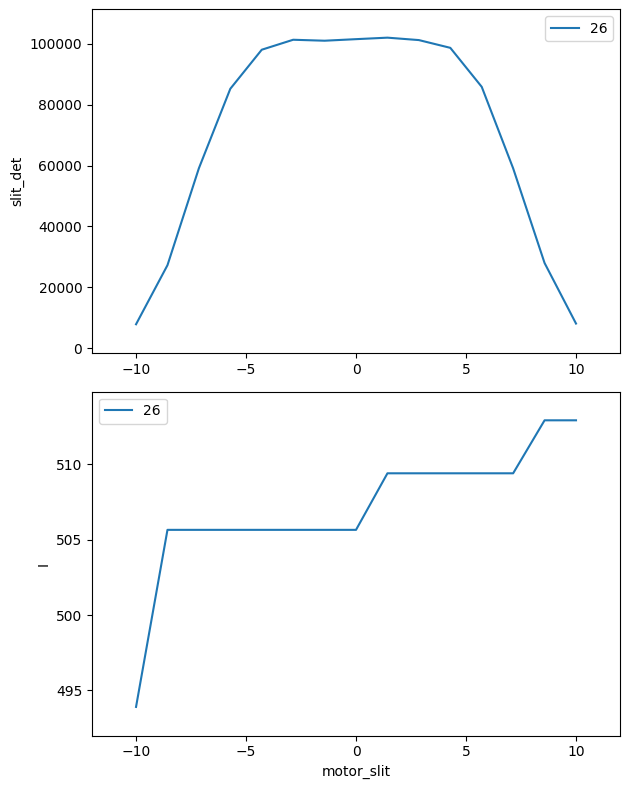

In [5]:
plt.gcf()  # Display a snapshot of the current state of the figure.

Previously we used the syntax ``db(...)`` to search for Headers. We looped through each Header and extracted some of the metadata encapsulated in it. We use the shorthand ``db[-N]`` to retrieve exactly _one_ header, the one corresponding to ``N`` runs ago. 

In [6]:
header = db[-1]  # Header for the most recent one (i.e. 1 run ago)

We can access the data as a table. This object is called a ``pandas.DataFrame``, a high-performance, spreadsheet-like object in Python.

In [7]:
data = header.table()

It display prettily, truncating if needed.

In [8]:
data

,time,slit_det,motor_slit,I
seq_num,,,,
1,2020-05-19 13:08:42.072070122,7823.0,-10.000000,493.905545
2,2020-05-19 13:08:42.105755329,27238.0,-8.571429,505.650554
3,2020-05-19 13:08:42.115315676,59106.0,-7.142857,505.650554
4,2020-05-19 13:08:42.124515057,85234.0,-5.714286,505.650554
5,2020-05-19 13:08:42.134342432,98066.0,-4.285714,505.650554
6,2020-05-19 13:08:42.143696070,101345.0,-2.857143,505.650554
7,2020-05-19 13:08:42.152780771,101027.0,-1.428571,505.650554
8,2020-05-19 13:08:42.162873268,101540.0,0.000000,505.650554
9,2020-05-19 13:08:42.172351837,102032.0,1.428571,509.401829


For large tables, it's handy to know how to ask for just the first or last couple rows.

It is easy to visualize.

In [9]:
data.plot(x='motor_slit', y='slit_det')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

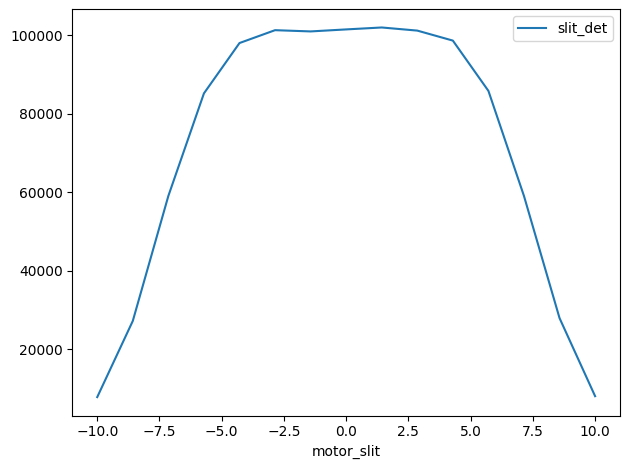

In [10]:
plt.gcf()  # Display a snapshot of the current state of the figure.

In [11]:
data.head()

,time,slit_det,motor_slit,I
seq_num,,,,
1,2020-05-19 13:08:42.072070122,7823.0,-10.000000,493.905545
2,2020-05-19 13:08:42.105755329,27238.0,-8.571429,505.650554
3,2020-05-19 13:08:42.115315676,59106.0,-7.142857,505.650554
4,2020-05-19 13:08:42.124515057,85234.0,-5.714286,505.650554
5,2020-05-19 13:08:42.134342432,98066.0,-4.285714,505.650554


In [12]:
data.tail()

,time,slit_det,motor_slit,I
seq_num,,,,
11,2020-05-19 13:08:42.190649748,98688.0,4.285714,509.401829
12,2020-05-19 13:08:42.214546442,85866.0,5.714286,509.401829
13,2020-05-19 13:08:42.244812012,59076.0,7.142857,509.401829
14,2020-05-19 13:08:42.288480997,27955.0,8.571429,512.916432
15,2020-05-19 13:08:42.332451105,8059.0,10.000000,512.916432


Statistics on columns are simple to compute.

In [13]:
data.mean()

slit_det      7.095273e+04
motor_slit    4.736952e-16
I             5.070868e+02
dtype: float64

In [14]:
data.min()

time          2020-05-19 13:08:42.072070122
slit_det                               7823
motor_slit                              -10
I                                   493.906
dtype: object

Or just ask for all the common stats at once:

In [15]:
data.describe()

,slit_det,motor_slit,I
count,15.000000,1.500000e+01,15.000000
mean,70952.733333,4.736952e-16,507.086762
std,36410.000064,6.388766e+00,4.495642
min,7823.000000,-1.000000e+01,493.905545
25%,43515.500000,-5.000000e+00,505.650554
50%,85866.000000,0.000000e+00,505.650554
75%,101131.500000,5.000000e+00,509.401829
max,102032.000000,1.000000e+01,512.916432


## Do analysis, and plot

### Normalize by beam current

We can do math on the columns, and we can add new columns.

In [16]:
data['normalized'] = data['slit_det'] / data['I'] * data['I'].mean()

We can plot them conveniently, addressing the columns by name.

In [17]:
plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

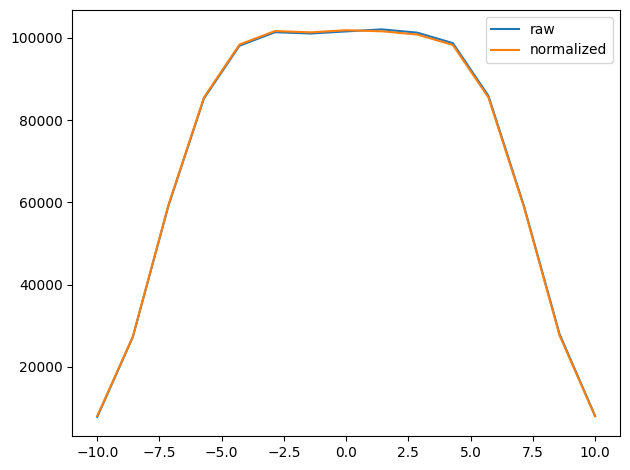

In [18]:
plt.plot('motor_slit', 'slit_det', data=data, label='raw')
plt.plot('motor_slit', 'normalized', data=data, label='normalized')
plt.legend()
plt.gcf()

### Select only rows with high beam current

Select rows where the current is above `500`.

In [19]:
data[data['I'] > 500]

,time,slit_det,motor_slit,I,normalized
seq_num,,,,,
2,2020-05-19 13:08:42.105755329,27238.0,-8.571429,505.650554,27315.364578
3,2020-05-19 13:08:42.115315676,59106.0,-7.142857,505.650554,59273.879827
4,2020-05-19 13:08:42.124515057,85234.0,-5.714286,505.650554,85476.091652
5,2020-05-19 13:08:42.134342432,98066.0,-4.285714,505.650554,98344.538610
6,2020-05-19 13:08:42.143696070,101345.0,-2.857143,505.650554,101632.852013
7,2020-05-19 13:08:42.152780771,101027.0,-1.428571,505.650554,101313.948792
8,2020-05-19 13:08:42.162873268,101540.0,0.000000,505.650554,101828.405875
9,2020-05-19 13:08:42.172351837,102032.0,1.428571,509.401829,101568.297457
10,2020-05-19 13:08:42.181491375,101236.0,2.857143,509.401829,100775.915021


...or, where the the current is above the 30th percentile.

In [20]:
data[data['I'] > data['I'].quantile(0.30)]

,time,slit_det,motor_slit,I,normalized
seq_num,,,,,
9,2020-05-19 13:08:42.172351837,102032.0,1.428571,509.401829,101568.297457
10,2020-05-19 13:08:42.181491375,101236.0,2.857143,509.401829,100775.915021
11,2020-05-19 13:08:42.190649748,98688.0,4.285714,509.401829,98239.494859
12,2020-05-19 13:08:42.214546442,85866.0,5.714286,509.401829,85475.766715
13,2020-05-19 13:08:42.244812012,59076.0,7.142857,509.401829,58807.518627
14,2020-05-19 13:08:42.288480997,27955.0,8.571429,512.916432,27637.270995
15,2020-05-19 13:08:42.332451105,8059.0,10.000000,512.916432,7967.403575


...and plot just those rows, using a marker so it is easy to see which points have been disqualified due to low current.

In [21]:
data[data['I'] > data['I'].quantile(0.30)].plot(x='motor_slit', y='slit_det', marker='o')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Histogram the current

In [22]:
plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

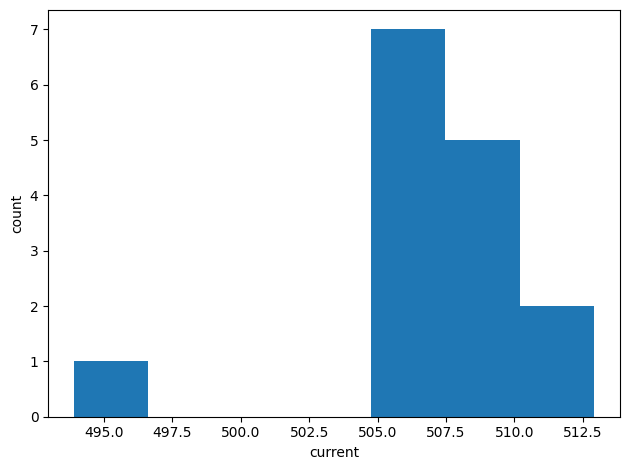

In [23]:
plt.hist(data['I'], bins='auto')
plt.xlabel('current')
plt.ylabel('count')
plt.gcf()

Not enough data to be interesting. Try collecting a bunch of current data by itself and then try this again.

In [24]:
# Creating a figure explicitly in advance helps with the
# top-to-bottom flow of this notebook, but it is not necessary.
# If this is omitted, bluesky will cause a figure to appear
# during the RE(...) execution below.
plt.figure("I vs time")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

In [25]:
RE(count([I], num=200, delay=0.1))



Transient Scan ID: 27     Time: 2020-05-19 13:08:44
Persistent Unique Scan ID: '36099f72-3ddb-4025-8c83-117d21cf964b'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|         1 | 13:08:44.4 |        487 |
|         2 | 13:08:44.4 |        481 |


/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/bluesky/utils.py:1502: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  f_mgr.canvas.draw()


|         3 | 13:08:44.5 |        479 |
|         4 | 13:08:44.6 |        477 |


|         5 | 13:08:44.7 |        476 |
|         6 | 13:08:44.8 |        475 |


|         7 | 13:08:45.0 |        475 |
|         8 | 13:08:45.0 |        476 |
|         9 | 13:08:45.1 |        477 |


|        10 | 13:08:45.3 |        479 |
|        11 | 13:08:45.3 |        481 |
|        12 | 13:08:45.4 |        484 |


|        13 | 13:08:45.6 |        487 |
|        14 | 13:08:45.6 |        491 |
|        15 | 13:08:45.7 |        495 |


|        16 | 13:08:45.9 |        499 |
|        17 | 13:08:45.9 |        503 |
|        18 | 13:08:46.0 |        507 |


|        19 | 13:08:46.2 |        510 |
|        20 | 13:08:46.2 |        514 |
|        21 | 13:08:46.3 |        517 |


|        22 | 13:08:46.5 |        520 |
|        23 | 13:08:46.6 |        522 |
|        24 | 13:08:46.7 |        523 |


|        25 | 13:08:46.8 |        525 |
|        26 | 13:08:46.9 |        525 |
|        27 | 13:08:47.0 |        525 |


|        28 | 13:08:47.1 |        524 |
|        29 | 13:08:47.2 |        523 |
|        30 | 13:08:47.3 |        521 |


|        31 | 13:08:47.4 |        518 |
|        32 | 13:08:47.5 |        515 |
|        33 | 13:08:47.6 |        512 |


|        34 | 13:08:47.7 |        508 |
|        35 | 13:08:47.8 |        505 |
|        36 | 13:08:47.9 |        501 |


|        37 | 13:08:48.0 |        497 |
|        38 | 13:08:48.1 |        493 |
|        39 | 13:08:48.2 |        489 |


|        40 | 13:08:48.3 |        486 |
|        41 | 13:08:48.4 |        483 |
|        42 | 13:08:48.5 |        480 |


|        43 | 13:08:48.6 |        478 |
|        44 | 13:08:48.7 |        476 |
|        45 | 13:08:48.8 |        475 |


|        46 | 13:08:48.9 |        475 |
|        47 | 13:08:49.0 |        475 |
|        48 | 13:08:49.1 |        476 |


|        49 | 13:08:49.2 |        478 |
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|        50 | 13:08:49.3 |        480 |
|        51 | 13:08:49.4 |        482 |


|        52 | 13:08:49.5 |        485 |
|        53 | 13:08:49.6 |        489 |
|        54 | 13:08:49.7 |        492 |


|        55 | 13:08:49.8 |        496 |
|        56 | 13:08:49.9 |        500 |
|        57 | 13:08:50.0 |        504 |


|        58 | 13:08:50.1 |        508 |
|        59 | 13:08:50.2 |        512 |
|        60 | 13:08:50.3 |        515 |


|        61 | 13:08:50.4 |        518 |
|        62 | 13:08:50.5 |        520 |
|        63 | 13:08:50.6 |        522 |


|        64 | 13:08:50.7 |        524 |
|        65 | 13:08:50.8 |        525 |
|        66 | 13:08:50.9 |        525 |


|        67 | 13:08:51.0 |        525 |
|        68 | 13:08:51.1 |        524 |
|        69 | 13:08:51.2 |        522 |


|        70 | 13:08:51.3 |        520 |
|        71 | 13:08:51.4 |        517 |
|        72 | 13:08:51.5 |        514 |


|        73 | 13:08:51.6 |        511 |
|        74 | 13:08:51.7 |        507 |
|        75 | 13:08:51.8 |        503 |


|        76 | 13:08:51.9 |        499 |
|        77 | 13:08:52.0 |        495 |
|        78 | 13:08:52.1 |        491 |


|        79 | 13:08:52.2 |        488 |
|        80 | 13:08:52.3 |        484 |
|        81 | 13:08:52.4 |        482 |


|        82 | 13:08:52.5 |        479 |
|        83 | 13:08:52.6 |        477 |
|        84 | 13:08:52.7 |        476 |


|        85 | 13:08:52.9 |        475 |
|        86 | 13:08:52.9 |        475 |
|        87 | 13:08:53.0 |        476 |


|        88 | 13:08:53.2 |        477 |
|        89 | 13:08:53.3 |        478 |
|        90 | 13:08:53.4 |        481 |


|        91 | 13:08:53.5 |        483 |
|        92 | 13:08:53.6 |        487 |
|        93 | 13:08:53.7 |        490 |


|        94 | 13:08:53.8 |        494 |
|        95 | 13:08:53.9 |        498 |
|        96 | 13:08:54.0 |        502 |


|        97 | 13:08:54.1 |        506 |
|        98 | 13:08:54.2 |        509 |
|        99 | 13:08:54.3 |        513 |


+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|       100 | 13:08:54.4 |        516 |
|       101 | 13:08:54.5 |        519 |
|       102 | 13:08:54.6 |        521 |


|       103 | 13:08:54.7 |        523 |
|       104 | 13:08:54.8 |        524 |
|       105 | 13:08:54.9 |        525 |


|       106 | 13:08:55.0 |        525 |
|       107 | 13:08:55.1 |        524 |
|       108 | 13:08:55.2 |        523 |


|       109 | 13:08:55.3 |        521 |
|       110 | 13:08:55.4 |        519 |
|       111 | 13:08:55.5 |        516 |


|       112 | 13:08:55.6 |        513 |
|       113 | 13:08:55.7 |        509 |
|       114 | 13:08:55.8 |        506 |


|       115 | 13:08:55.9 |        502 |
|       116 | 13:08:56.0 |        498 |


|       117 | 13:08:56.1 |        494 |
|       118 | 13:08:56.2 |        490 |


|       119 | 13:08:56.3 |        487 |
|       120 | 13:08:56.4 |        483 |
|       121 | 13:08:56.5 |        481 |


|       122 | 13:08:56.6 |        478 |
|       123 | 13:08:56.7 |        477 |
|       124 | 13:08:56.8 |        476 |


|       125 | 13:08:56.9 |        475 |
|       126 | 13:08:57.0 |        475 |
|       127 | 13:08:57.1 |        476 |


|       128 | 13:08:57.2 |        477 |
|       129 | 13:08:57.3 |        479 |
|       130 | 13:08:57.4 |        481 |


|       131 | 13:08:57.5 |        484 |
|       132 | 13:08:57.6 |        488 |


|       133 | 13:08:57.7 |        491 |
|       134 | 13:08:57.8 |        499 |
|       135 | 13:08:57.9 |        499 |
|       136 | 13:08:58.0 |        507 |


|       137 | 13:08:58.2 |        510 |
|       138 | 13:08:58.2 |        514 |
|       139 | 13:08:58.3 |        517 |


|       140 | 13:08:58.5 |        520 |
|       141 | 13:08:58.5 |        522 |
|       142 | 13:08:58.7 |        523 |


|       143 | 13:08:58.8 |        525 |
|       144 | 13:08:58.9 |        525 |
|       145 | 13:08:59.0 |        525 |


|       146 | 13:08:59.1 |        524 |
|       147 | 13:08:59.2 |        523 |
|       148 | 13:08:59.3 |        521 |


|       149 | 13:08:59.4 |        518 |
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|       150 | 13:08:59.5 |        515 |


|       151 | 13:08:59.6 |        512 |
|       152 | 13:08:59.7 |        508 |
|       153 | 13:08:59.8 |        504 |


|       154 | 13:08:59.9 |        501 |
|       155 | 13:09:00.0 |        497 |
|       156 | 13:09:00.1 |        493 |


|       157 | 13:09:00.2 |        489 |
|       158 | 13:09:00.3 |        486 |
|       159 | 13:09:00.4 |        483 |


|       160 | 13:09:00.5 |        480 |
|       161 | 13:09:00.6 |        478 |


|       162 | 13:09:00.7 |        476 |
|       163 | 13:09:00.8 |        475 |


|       164 | 13:09:00.9 |        475 |
|       165 | 13:09:01.0 |        475 |


|       166 | 13:09:01.1 |        476 |
|       167 | 13:09:01.2 |        478 |
|       168 | 13:09:01.3 |        480 |


|       169 | 13:09:01.4 |        482 |
|       170 | 13:09:01.5 |        485 |
|       171 | 13:09:01.6 |        489 |


|       172 | 13:09:01.7 |        492 |
|       173 | 13:09:01.8 |        496 |
|       174 | 13:09:01.9 |        500 |


|       175 | 13:09:02.0 |        504 |
|       176 | 13:09:02.1 |        508 |
|       177 | 13:09:02.2 |        512 |


|       178 | 13:09:02.3 |        515 |
|       179 | 13:09:02.5 |        518 |
|       180 | 13:09:02.5 |        520 |


|       181 | 13:09:02.7 |        522 |
|       182 | 13:09:02.8 |        524 |
|       183 | 13:09:02.9 |        525 |


|       184 | 13:09:03.0 |        525 |
|       185 | 13:09:03.1 |        525 |
|       186 | 13:09:03.2 |        524 |


|       187 | 13:09:03.3 |        522 |
|       188 | 13:09:03.4 |        520 |


|       189 | 13:09:03.5 |        517 |
|       190 | 13:09:03.6 |        514 |


|       191 | 13:09:03.7 |        511 |
|       192 | 13:09:03.8 |        507 |
|       193 | 13:09:03.9 |        503 |


|       194 | 13:09:04.0 |        495 |
|       195 | 13:09:04.1 |        495 |
|       196 | 13:09:04.2 |        491 |


|       197 | 13:09:04.3 |        485 |
|       198 | 13:09:04.4 |        485 |
|       199 | 13:09:04.5 |        479 |


+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|       200 | 13:09:04.6 |        477 |
+-----------+------------+------------+
generator count ['36099f72'] (scan num: 27)





('36099f72-3ddb-4025-8c83-117d21cf964b',)

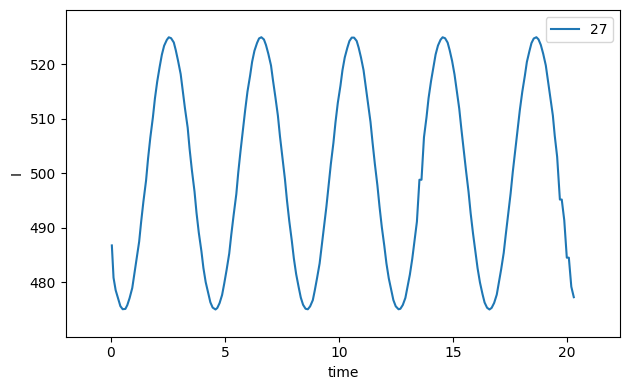

In [26]:
plt.gcf()  # Display a snapshot of the current state of the figure.

In [27]:
plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

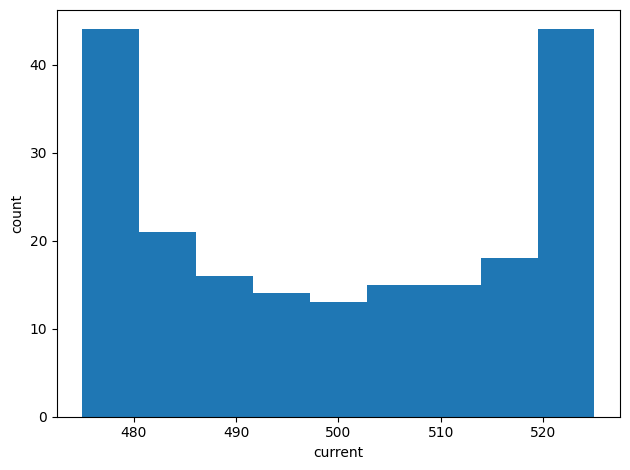

In [28]:
more_current_data = db[-1].table()
plt.hist(more_current_data['I'], bins='auto')
plt.xlabel('current')
plt.ylabel('count')
plt.gcf()

## Exercises

Spend some time reading [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html), and use this notebook to try some of the examples there.

In [29]:
# Hack away....